In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Here we are giving print statement to show successful import of all these libraries.
print("done")


done


In [5]:
#reading our csv file in a variable using pandas library.
df= pd.read_csv("C:/Users/hp/Desktop/Skills/EDA/Customer_Churn.csv")
#here we have converted all backward slashes into forward slashes for successfully importing our dataset.
print("dataset imported successfully")
#print statement is provided for ensuring successfull import of our data.

dataset imported successfully


In [7]:
#Now, to understand the different columns in our dataset and the type of values in each column, we are using the head() function of the pandas library.
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [9]:
#to understand the columns in our dataset we are performing data inspection, for which we are using info function from pandas library.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Here, we have the "TotalCharges" column's datatype as an object. Using Excel, we discovered that it contains some blank values, so we will replace them with 0 and change the datatype to float.
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"]= df["TotalCharges"].astype("float")

In [13]:
df.info()
#to ensure that the changes we have done are visible in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
#determining the number of null values in each column.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
#calculating the percentage of missing values for each column 
(df.isnull().sum()/df.shape[0])*100
#generally percentage of missing data is calculated,columns with more than 50% of missing values are avoided from being used.

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

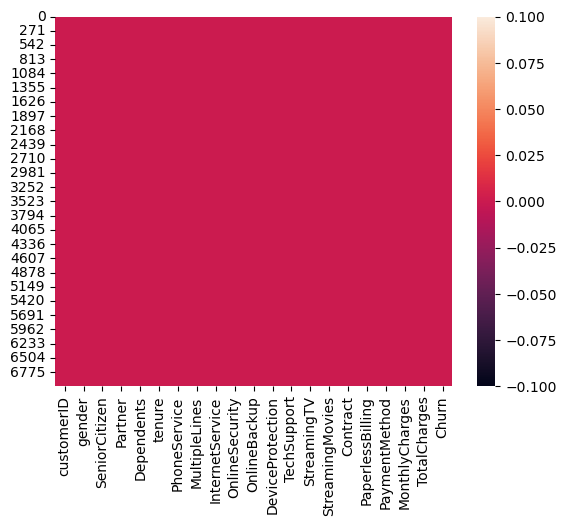

In [24]:
#plotting graph to visualize null values 
sns.heatmap(df.isnull())
plt.show()


In [17]:
#determining the overall null values in complete dataset.
df.isnull().sum().sum()

0

In [19]:
#performing descriptive analysis of our dataset.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
#next step of our data inspection is to find out the null values in our primary key that is customerID
df["customerID"].duplicated().sum()

0

C:\Users\hp\AppData\Local\Temp\ipykernel_15920\3074044623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.countplot(x="Churn", data=df,palette=["#76a5af","#134f5c"])


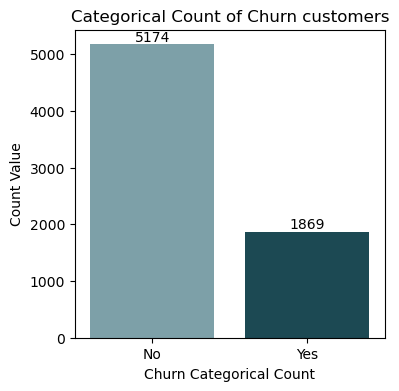

In [21]:
#Data Analysis and Finding Insights of our project.
#1.Using countplot from seaborn library to find number of customers churned out and retained by the company.
plt.figure(figsize= (4,4))
plot1 = sns.countplot(x="Churn", data=df,palette=["#76a5af","#134f5c"])
plt.xlabel("Churn Categorical Count")
plt.ylabel("Count Value")
plt.title("Categorical Count of Churn customers")
plot1.bar_label(plot1.containers[0])
plot1.bar_label(plot1.containers[1])
plt.show()
#here for some amazing colours i have used colour palette from color-hex.com link for it "https://www.color-hex.com/color-palette/1051732".

we have 5174 customers still with the company and 1869 customers have churned out from the company. Let us try to find out the reason and various factor responsible for this number of churned out customers.

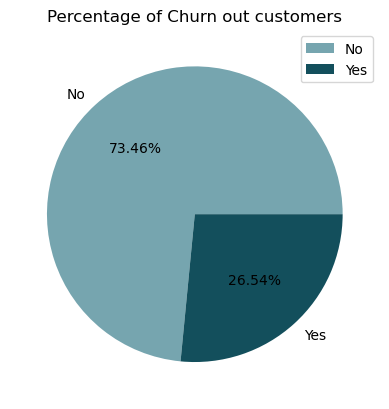

In [29]:
#plot2 Drawing pie chart to determine the percentage of churn customers.
gb= df.groupby("Churn").agg({"Churn":"count"})
colours= ["#76a5af","#134f5c"]
plt.pie(gb["Churn"], labels= gb.index, autopct="%1.2f%%", colors=colours)
plt.title("Percentage of Churn out customers")
plt.legend()
plt.show()

 The percentage of customers churned out gives us a better understanding of our churned and retained customers. Now, let us focus on determining the reason behind it.

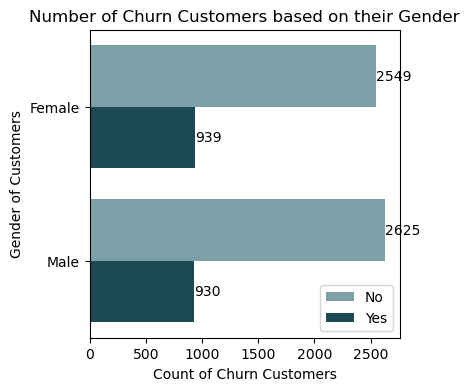

In [37]:
#3.Determining churned-out customers based on gender.
plt.figure(figsize= (4,4))
plot3= sns.countplot(y="gender",data= df, hue="Churn",palette=["#76a5af","#134f5c"])
plot3.bar_label(plot3.containers[0])
plot3.bar_label(plot3.containers[1])
plt.ylabel("Gender of Customers")
plt.xlabel("Count of Churn Customers")
plt.title("Number of Churn Customers based on their Gender")
plt.legend()
plt.show()



This shows that the number of churn customers does not depend on their gender. Through this we can also conclude that their is no such schemes or offers by the company which are for any particular gender.


<Figure size 400x400 with 0 Axes>

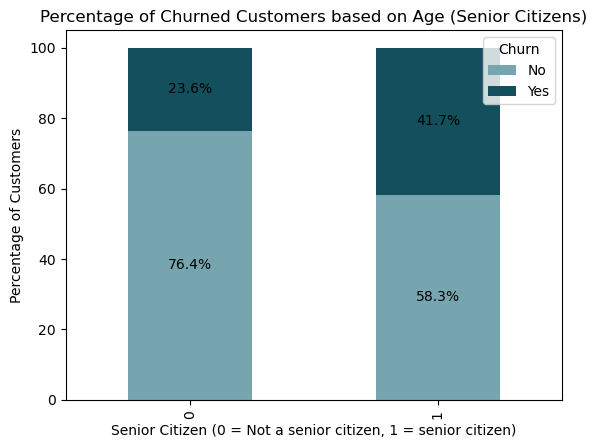

In [29]:
# Now moving to our next column "SeniorCitizen" we can also check if the age of the customer affect the number of churn customers.
#4.Determining churned-out customers based on age(SeniorCitizen).
# Create crosstab for stacked bar chart (normalized to get percentages)
plt.figure(figsize= (4,4))
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart
plot4 = cross_tab.plot(kind='bar', stacked=True, color=['#76a5af', '#134f5c'])

# Add labels on the bars
for container in plot4.containers:
    plot4.bar_label(container, label_type='center', fmt='%.1f%%')

# Set labels and title
plt.xlabel("Senior Citizen (0 = Not a senior citizen, 1 = senior citizen)")
plt.ylabel("Percentage of Customers")
plt.title("Percentage of Churned Customers based on Age (Senior Citizens)")
plt.legend(title="Churn", loc="upper right")

# Show the plot
plt.show()

It concludes that a comparatively greater number of senior citizens are churned out. This may be because the offers are highly tailored to the needs of youth, and so is the cost. To reduce the percentage of churned-out senior citizens, we can launch some schemes that align with the requirements of the senior citizen and reduce the cost of this scheme compared to other schemes of the company. 

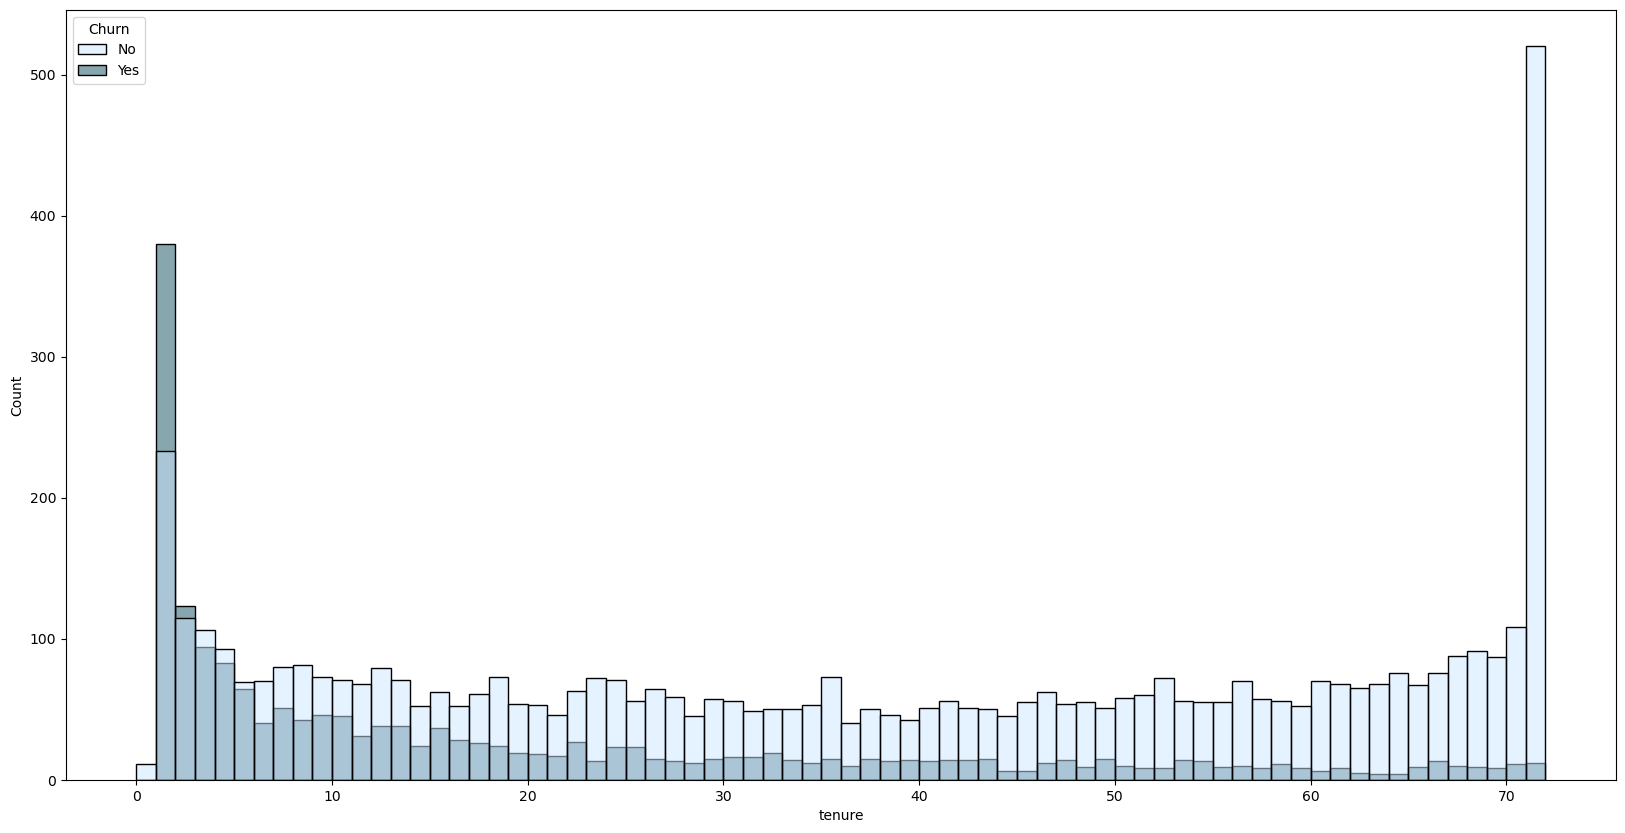

In [41]:
#5.Using histplot() for tenure column.
plt.figure(figsize= (20,10))
plot5= sns.histplot(x="tenure",data=df, hue="Churn",palette=["#cce6ff","#134f5c"],bins=72)
plt.show()

Through this graph we can conclude that long tenure customers have stayed and people with short tenure churned out. So we need to focus that customer sign-in with the company for a long-term tenure this will reduce the percentage of churn out customers.

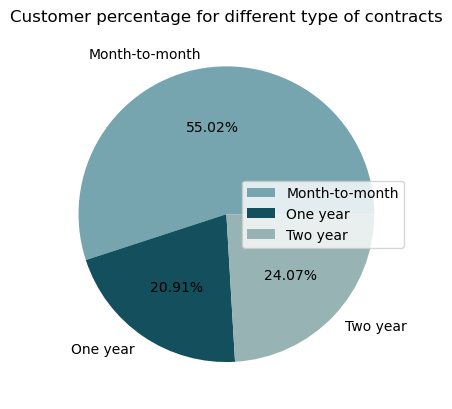

In [43]:
#6.using pie chart to determine the types of contracts available and percentage of customer of each type of contract.
gb1= df.groupby("Contract").agg({"Contract":"count"})
colours= ["#76a5af","#134f5c","#97b3b4"]
plt.pie(gb1["Contract"], labels= gb1.index, autopct="%1.2f%%", colors=colours)
plt.title("Customer percentage for different type of contracts")
plt.legend(loc="right")
plt.show()

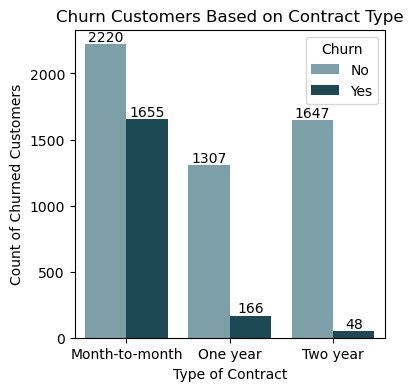

In [45]:
#7.Finding out number of churn customers based on contract type.
plt.figure(figsize= (4,4))
plot7= sns.countplot(x="Contract", data=df, hue="Churn",palette= ["#76a5af","#134f5c"])
plot7.bar_label(plot7.containers[0])
plot7.bar_label(plot7.containers[1])
plt.title("Churn Customers Based on Contract Type")
plt.xlabel("Type of Contract")
plt.ylabel("Count of Churned Customers")
plt.show()

Customers having a contract type of "Two Years" have a very low percentage of churned-out customers. Through this, we can conclude that we should encourage our customers to purchase a "Two-year" contract type. We should also look at why the "Month-to-month" contact type customers are not retaining with the company. Their feedback should be taken and the common reason for most customer should be understood and proper steps should be taken.

In [47]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

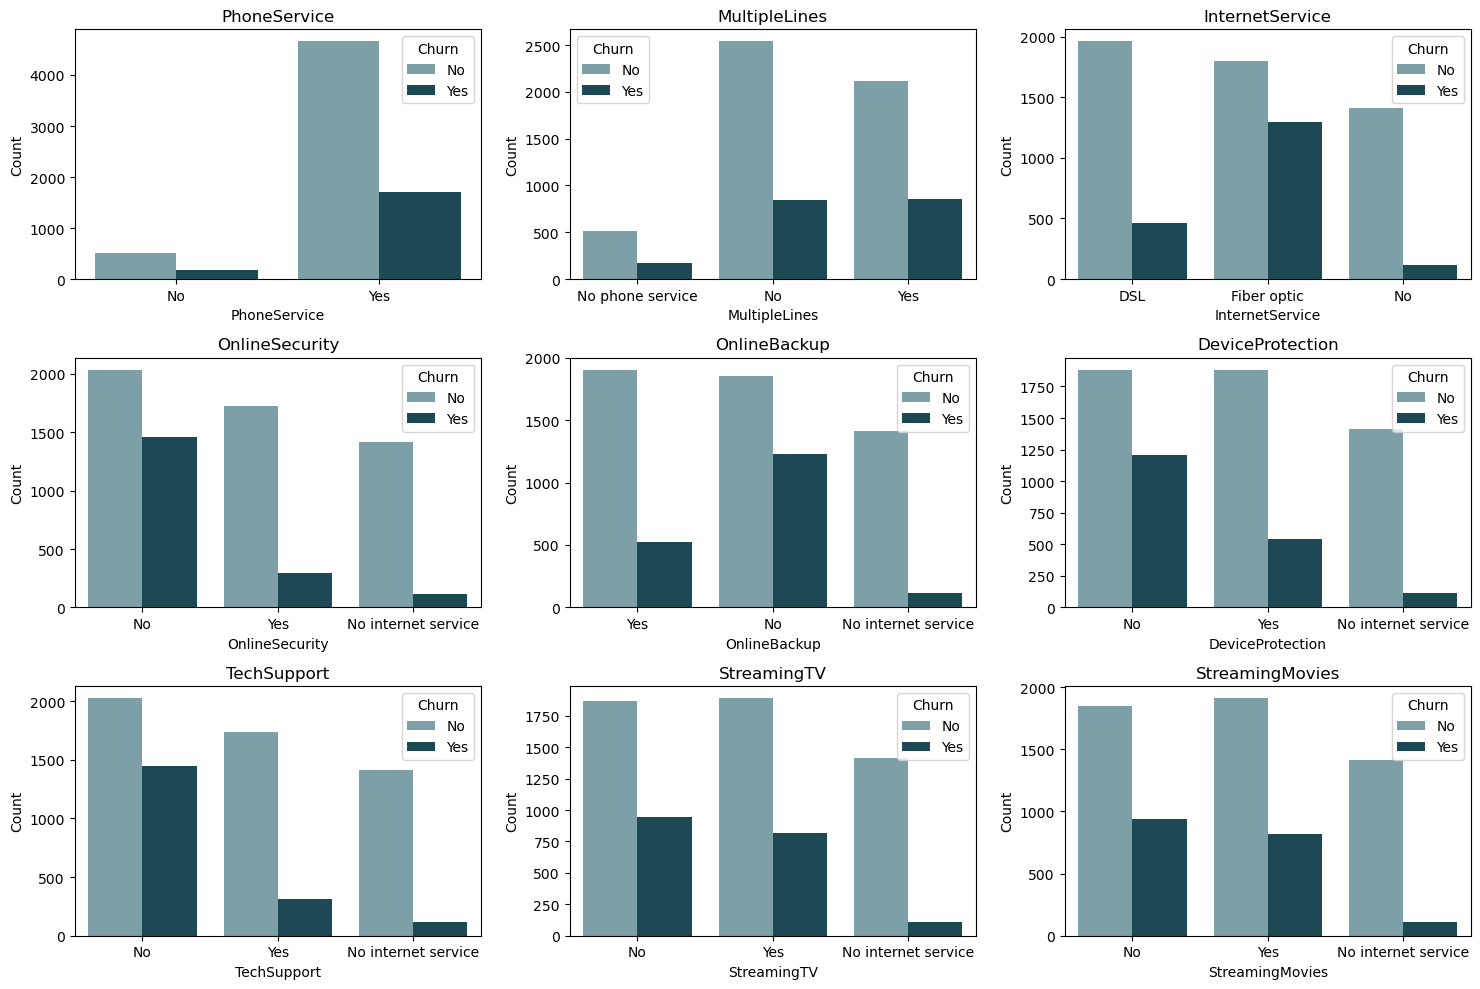

In [49]:
#8.Creating subplot for columns 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'
# Columns to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # Adjust size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create count plots
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue= df["Churn"],palette= ["#76a5af","#134f5c"])
    axes[i].set_title(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

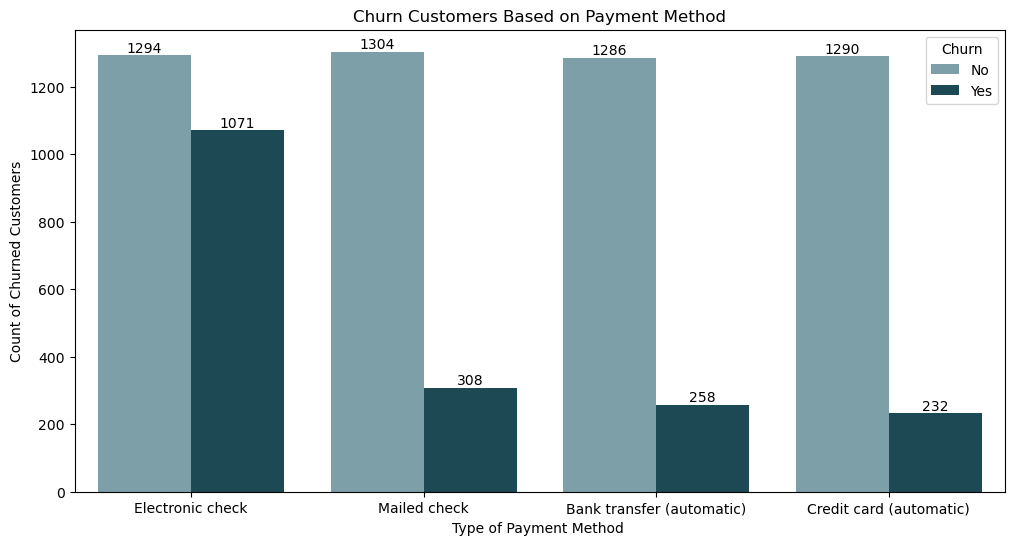

In [25]:
#9. plotting to understand PaymentMethod column
plt.figure(figsize= (12,6))
plot7= sns.countplot(x="PaymentMethod", data=df, hue="Churn",palette= ["#76a5af","#134f5c"])
plot7.bar_label(plot7.containers[0])
plot7.bar_label(plot7.containers[1])
plt.title("Churn Customers Based on Payment Method")
plt.xlabel("Type of Payment Method ")
plt.ylabel("Count of Churned Customers")

plt.show()

Through this we can reduce churn customer by encouraging customer to use Mailed check, Bank Transfer(automatic), Credit card(automatic) as their Payment Method.

The conclusion drawn from this overall analysis is that the company is doing good, only 26.5% of customers churned out. We should focus on some new offers for senior citizens that are cost-effective and align with the requirements of the senior citizens. Customers should be encouraged to purchase a "Two-year" contract type and sign long-term tenure this will help reduce the percentage of churned customers. Also, customers should be advised to not use "electronic checks" as their payment method as customers have "electronic check" as payment method mostly churned out.